 ## <a id='0'> **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL 🏈** </a>
##### *THE BRIDGE - DATA_SCIENCE 2023*
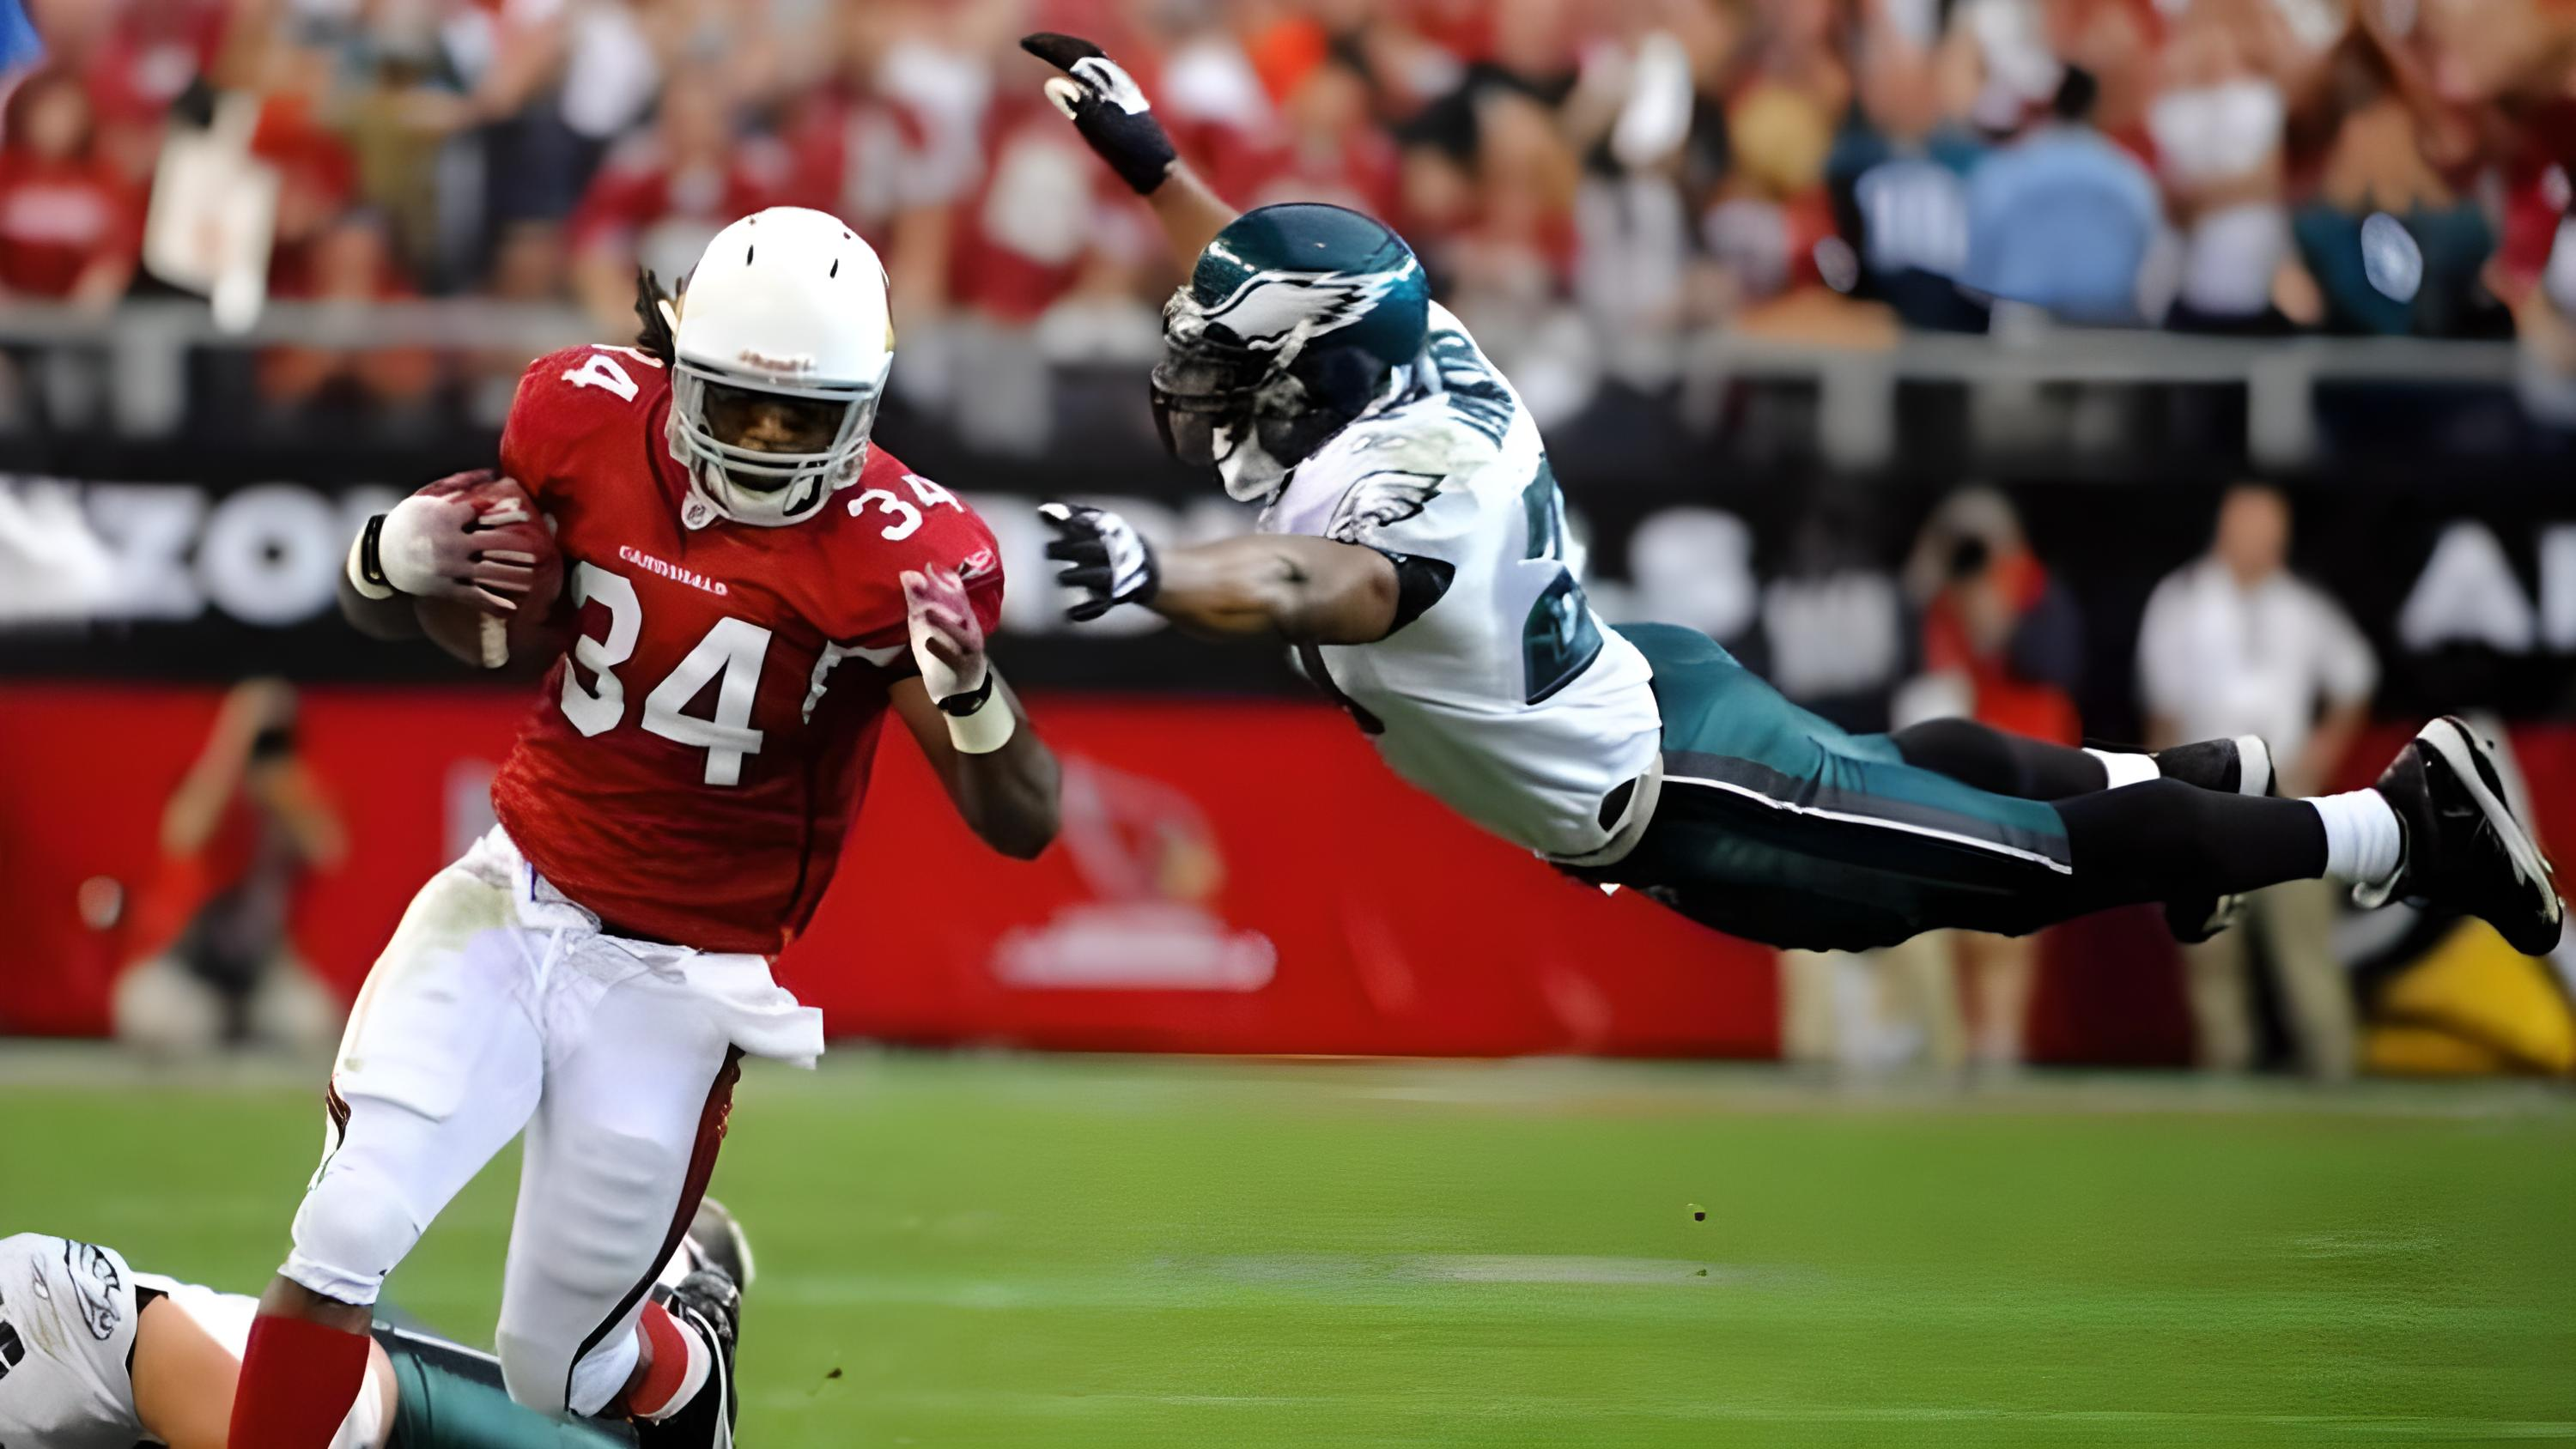

## **Índice**
---
1. [Introducción](#1)  
2. [Objetivo](#2)
3. [Hipótesis](#3)
4. [Librerias ibrerías](#)
   1. [Exploración inicial](#41)
    2. [Importación de bases de datos](#)
    4. [Depuración de bases de datos](#)
    6. [Análisis exploratorio de DataFrames resultantes](#)
        1. [DataFrame final](#)
5. [Análisis estadístico](#)
    1. [Análisis univariante](#)
    2. [Análisis bivariante](#)
    3. [Análisis multivariante](#)
6. [Conclusiones](#6)

-----
####  *Contacto*:
* Aquí podrás encontrar mi perfil personal:    [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) ![LinkedIn](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/linkedin.png)

* Para dudas y consultas :    [Gmail](ivan.corderocueva@gmail.com) ![Gmail](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/gmail.png)

* Mi baúl con todos mis proyectos :   [GitHub](https://github.com/ivancorderoc) ![GitHub](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/github.png)
-----

# <a id='1'>**1. Introducción**</a>

#### Este estudio se ha realizado gracias a una libreria dedica a la NFL y a Wikipedia.

La idea fundamental del proyecto es dilucidar si el estar sano influye significativamnete en el éxito de jugador. 
Así como también si a pesar de esas lesiones su grado de desempeño en el campo le permite ser un jugador referente.

# <a id='2'>**1. Objetivo**</a>

 ## <a id='4'> **1.1 Hipótesis.** </a>

1.  **¿Cuál es la relación entre lesiones y éxito en la NFL?**
2.  **¿Las consideras lesiones severas son las más habituales?**
3.  **¿Las lesiones leves pueden terminar con la carrera de los profesionales?**    
4.  **¿En qué época de la temporada regular existen más lesiones?**
5.  **¿Cuál es la posición que tiende lesionarse?**
6.  **¿Qué hace la NFL para intentar reducir el número de lesiones para que no acaben con la carrera/vida de los jugadores? *(pregunta a futuro)***


## <a id='4'> **1.1 Limpieza de datos.** </a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from funpymodeling.exploratory import freq_tbl
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

In [93]:
# Asignamos variables a los datasets con los que vamos a trabajar.
ranks_nfl = pd.read_csv("/Users/ivanlamb/Documents/GitHub/eda_nfl/src/data/processed/ranks_nfl.csv")
injuries = pd.read_csv("/Users/ivanlamb/Documents/GitHub/eda_nfl/src/data/processed/injuries.csv")

In [94]:
ranks_nfl.head(10)

,Rank,Player,Position,2010 Team,2011 Team,Reference,Year,2012 Team,Rank Change,2013 Team,2014 Team,2015 Team,2015 team,2016 team,Rank change,2017 team,Year accomplishments,2018 team,2019 team,2020 team
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Troy Polamalu,Safety,Pittsburgh Steelers,NaN,6.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Andre Johnson,Wide receiver,Houston Texans,NaN,7.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Darrelle Revis,Cornerback,New York Jets,NaN,8.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Drew Brees,Quarterback,New Orleans Saints,NaN,9.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Julius Peppers,Defensive end,Chicago Bears,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Vemos la informacion que nos da el *primer dataset*
print(ranks_nfl.shape)
print(ranks_nfl.info())

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   Player                1000 non-null   object 
 2   Position              1000 non-null   object 
 3   2010 Team             100 non-null    object 
 4   2011 Team             108 non-null    object 
 5   Reference             974 non-null    object 
 6   Year                  1000 non-null   float64
 7   2012 Team             105 non-null    object 
 8   Rank Change           400 non-null    object 
 9   2013 Team             111 non-null    object 
 10  2014 Team             106 non-null    object 
 11  2015 Team             9 non-null      object 
 12  2015 team             100 non-null    object 
 13  2016 team             105 non-null    object 
 14  Rank change           500 non-null    object 
 15  2017 team  

In [96]:
# Vemos los unicos de cada columna
print(ranks_nfl.nunique())

Rank                    100
Player                  403
Position                 20
2010 Team                30
2011 Team                34
Reference               274
Year                     10
2012 Team                32
Rank Change              68
2013 Team                33
2014 Team                31
2015 Team                 8
2015 team                32
2016 team                30
Rank change              68
2017 team                29
Year accomplishments    303
2018 team                32
2019 team                33
2020 team                14
dtype: int64


In [97]:
injuries.head(10)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,NaN,Questionable,Knee,NaN,Did Not Participate In Practice,2010-09-10 12:13:53
1,2010.0,REG,ARI,1.0,00-0022288,RB,Jason Wright,Jason,Wright,Toe,NaN,Questionable,Toe,NaN,Limited Participation in Practice,2010-09-10 12:13:44
2,2010.0,REG,ARI,1.0,00-0025668,CB,Michael Adams,Michael,Adams,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
3,2010.0,REG,ARI,1.0,00-0026939,LB,Will Davis,Will,Davis,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
4,2010.0,REG,ARI,1.0,00-0022921,WR,Larry Fitzgerald,Larry,Fitzgerald,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
5,2010.0,REG,ARI,1.0,00-0025602,TE,Ben Patrick,Ben,Patrick,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
6,2010.0,REG,ARI,1.0,00-0013126,LB,Joey Porter,Joey,Porter,Back,NaN,Probable,Back,NaN,Full Participation in Practice,NaN
7,2010.0,REG,ARI,1.0,00-0027691,WR,Andre Roberts,Andre,Roberts,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
8,2010.0,REG,ATL,1.0,00-0022781,WR,Michael Jenkins,Michael,Jenkins,Shoulder,NaN,Out,Shoulder,NaN,Did Not Participate In Practice,2010-09-10 12:53:27
9,2010.0,REG,ATL,1.0,00-0024183,CB,Brent Grimes,Brent,Grimes,Hip,NaN,Questionable,Hip,NaN,Full Participation in Practice,2010-09-10 12:52:50


In [98]:
# Vemos la informacion que nos da el *segundo* dataset*
print(injuries.shape)
print(injuries.info())

(51119, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51119 entries, 0 to 51118
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     51119 non-null  float64
 1   game_type                  51119 non-null  object 
 2   team                       51119 non-null  object 
 3   week                       51119 non-null  float64
 4   gsis_id                    51119 non-null  object 
 5   position                   51119 non-null  object 
 6   full_name                  51119 non-null  object 
 7   first_name                 51119 non-null  object 
 8   last_name                  51119 non-null  object 
 9   report_primary_injury      39778 non-null  object 
 10  report_secondary_injury    2145 non-null   object 
 11  report_status              39778 non-null  object 
 12  practice_primary_injury    51074 non-null  object 
 13  practice_secondary_injury  2773 no

In [99]:
# Vemos los unicos de cada columna

print(injuries.nunique())

season                          10
game_type                        5
team                            34
week                            21
gsis_id                       4470
position                        17
full_name                     4416
first_name                    1575
last_name                     2522
report_primary_injury          164
report_secondary_injury        103
report_status                    4
practice_primary_injury        194
practice_secondary_injury      130
practice_status                  5
date_modified                31553
dtype: int64


## *Limpieza de nuestros datasets.*
-   ### Primer dataset:

In [100]:
# Eliminamos todas las columnas innecesarias y las organizamos.

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [101]:
# Cambiamos los nombres en nuestra columna "Position"

ranks_nfl["Position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

-   ### *Segundo dataset:*

In [102]:
# Procedemos a eliminar columnas que no son importantes y de paso estandarizamos varios los nombres de las columnas
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified"],
              inplace=True)
injuries.rename(columns={'season':'Year',
                         'game_type':'Season',
                         'team':'Team',
                         'position':'Position',
                         'full_name': 'Player',
                         'week': 'Week'},
                inplace=True)

In [103]:
# eliminamos los valores faltantes y vemos como se va reduciendo nuestro dataset

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39733 entries, 0 to 51111
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     39733 non-null  float64
 1   Season                   39733 non-null  object 
 2   Team                     39733 non-null  object 
 3   Week                     39733 non-null  float64
 4   Position                 39733 non-null  object 
 5   Player                   39733 non-null  object 
 6   report_primary_injury    39733 non-null  object 
 7   report_status            39733 non-null  object 
 8   practice_primary_injury  39733 non-null  object 
 9   practice_status          39733 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [104]:
# Nos centraremos en jugadores que realmente están reportados como lesionados

injuries = injuries.loc[(injuries["practice_status"]== injuries["practice_status"].unique()[0]) | (injuries["practice_status"]== injuries["practice_status"].unique()[-1]) ]

In [105]:
# Nuestro análisis se centrará en la temporada regular

injuries = injuries[injuries["Season"].str.contains("REG")]

In [106]:
# Limpiamos la columna "Position"

injuries["Position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defense end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)


In [107]:
# Estandarizamos nuestras columnas para dejarlas en una categoría correspondiente.

injuries["report_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",}, inplace=True)


injuries["practice_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",
                                   "oblique": "Oblique"}, inplace=True)

In [108]:
# Actualizamos el nomnbre de dos equipos a fecha de hoy

injuries["Team"].replace({"SD":"LAC",
                          "STL":"LA",
                          "OAK":"LV",}
                         , inplace=True)

In [109]:
# Comprobamos el estado de nuestro dataset

injuries.iloc[[7]]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
20,2010.0,REG,BUF,1.0,Linebacker,Reggie Torbor,Chest,Out,Chest,Did Not Participate In Practice


In [110]:
# Procedemos dejarlo con índice correcto

injuries.reset_index(drop=True, inplace=True)

In [111]:
ranks_nfl[ranks_nfl["Position"]=="Kicker"]

,Rank,Player,Position,Year
497,98,Adam Vinatieri,Kicker,2014.0


###  **Análisis univariante**

Como podemos observar nuestros datasets fudamentalmente se caracterizan por ser de tipo categórico. Procedemos a valorar.

-   Primer dataset dataset:

    - Univariante ordenado

count    1000.000000
mean       50.500000
std        28.880514
min         1.000000
25%        25.750000
50%        50.500000
75%        75.250000
max       100.000000
Name: Rank, dtype: float64


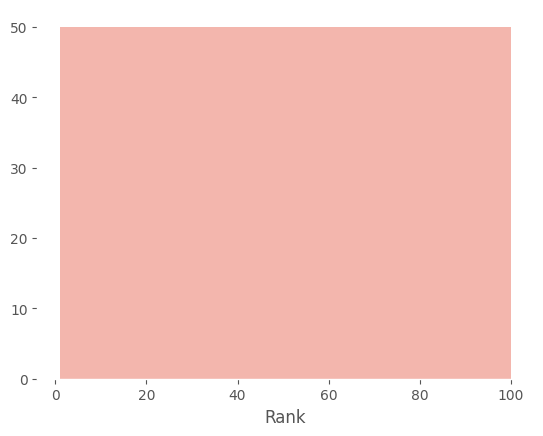

In [112]:
print(ranks_nfl["Rank"].describe())
sns.distplot(ranks_nfl["Rank"], kde=False, bins=20);

count    1000.000000
mean     2014.500000
std         2.873719
min      2010.000000
25%      2012.000000
50%      2014.500000
75%      2017.000000
max      2019.000000
Name: Year, dtype: float64


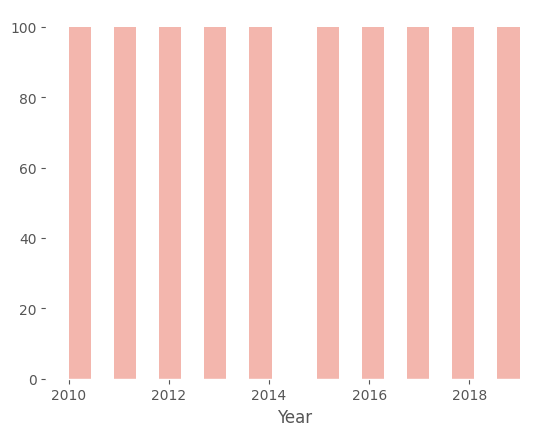

In [113]:
print(ranks_nfl["Year"].describe())
sns.distplot(ranks_nfl["Year"], kde=False, bins=20);

-   Primer dataset dataset:

    - Univariante **no** ordenado

In [114]:
ranks_nfl["Position"].value_counts()
ranks_nfl["Position"].value_counts(normalize=True)

Wide receiver       0.166
Quarterback         0.140
Linebacker          0.134
Running back        0.111
Defensive end       0.106
Cornerback          0.078
Safety              0.062
Defensive tackle    0.062
Tight end           0.054
Offensive tackle    0.049
Guard               0.025
Center              0.012
Kicker              0.001
Name: Position, dtype: float64

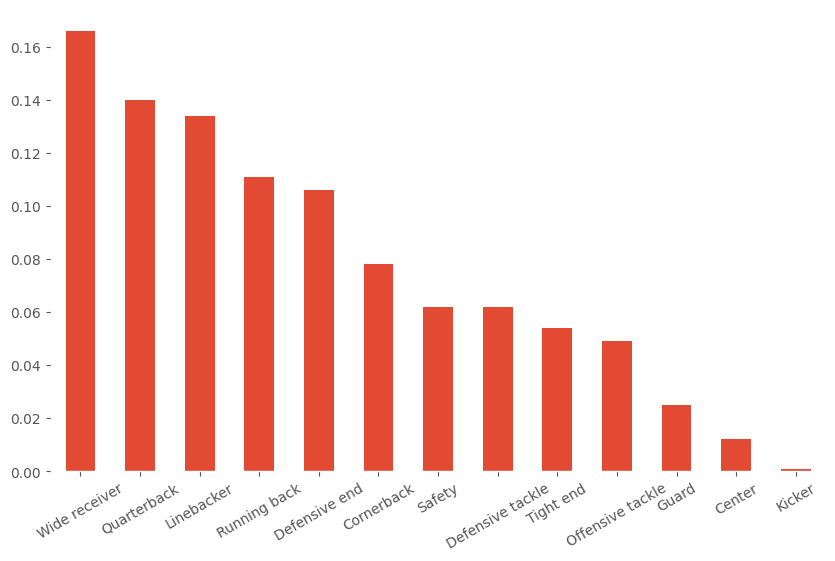

In [115]:
plt.figure(figsize=(10,6))
ranks_nfl["Position"].value_counts(normalize=True).head(50).plot.bar()
plt.xticks(rotation = 30);

In [116]:
ranks_nfl["Player"].value_counts()
ranks_nfl["Player"].value_counts(normalize=True)

Tom Brady           0.010
Drew Brees          0.010
Larry Fitzgerald    0.010
Aaron Rodgers       0.010
Von Miller          0.009
                    ...  
Sammy Watkins       0.001
Richie Incognito    0.001
Mike Wallace        0.001
Donovan McNabb      0.001
Darren Waller       0.001
Name: Player, Length: 403, dtype: float64

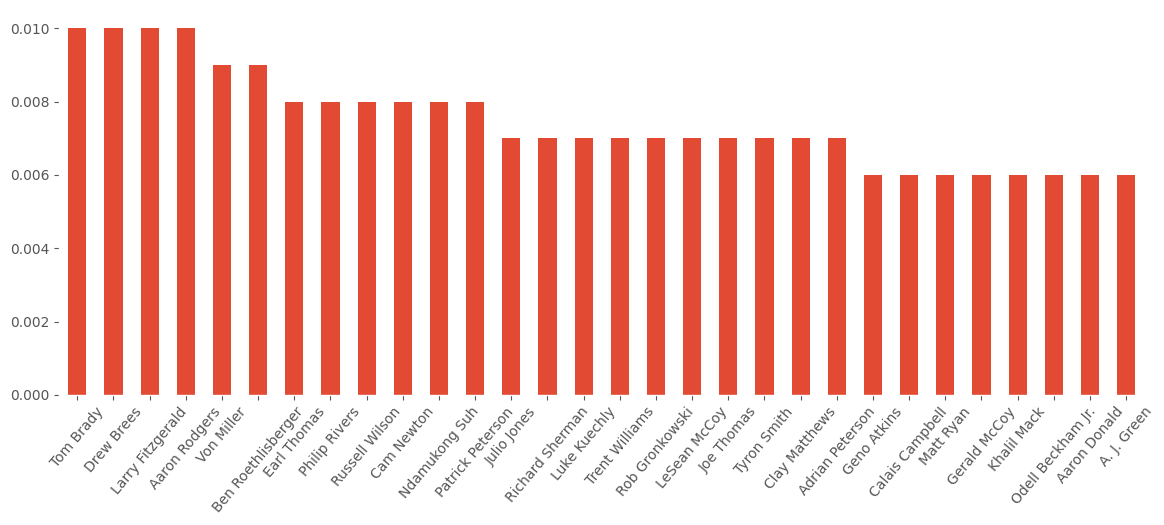

In [117]:
plt.figure(figsize=(14,5))
ranks_nfl["Player"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 50);

-   Segundo dataset dataset:

    - Univariante ordenado

count    12811.000000
mean         9.062524
std          4.840605
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         17.000000
Name: Week, dtype: float64


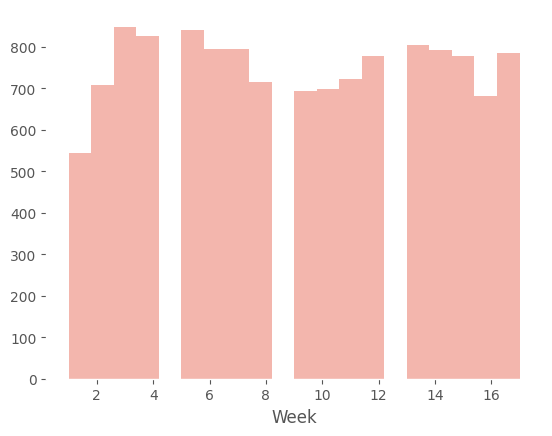

In [118]:
print(injuries["Week"].describe())
sns.distplot(injuries["Week"], kde=False, bins=20);

count    12811.000000
mean      2014.440012
std          2.858498
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2017.000000
max       2019.000000
Name: Year, dtype: float64


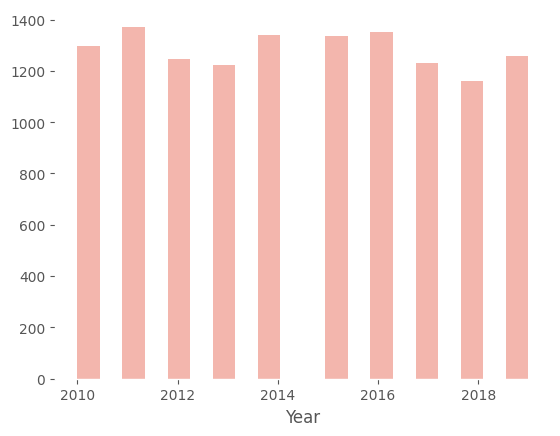

In [119]:
print(injuries["Year"].describe())
sns.distplot(injuries["Year"], kde=False, bins=20);


-   Segundo dataset dataset:

    - Univariante **no** ordenado

In [120]:
print(injuries["Season"].value_counts())
injuries["Week"].value_counts(normalize=True)


REG    12811
Name: Season, dtype: int64


3.0     0.066271
5.0     0.065569
4.0     0.064476
13.0    0.062759
6.0     0.062134
7.0     0.062134
14.0    0.061978
17.0    0.061275
12.0    0.060807
15.0    0.060729
11.0    0.056436
8.0     0.055889
2.0     0.055265
10.0    0.054484
9.0     0.054094
16.0    0.053236
1.0     0.042464
Name: Week, dtype: float64

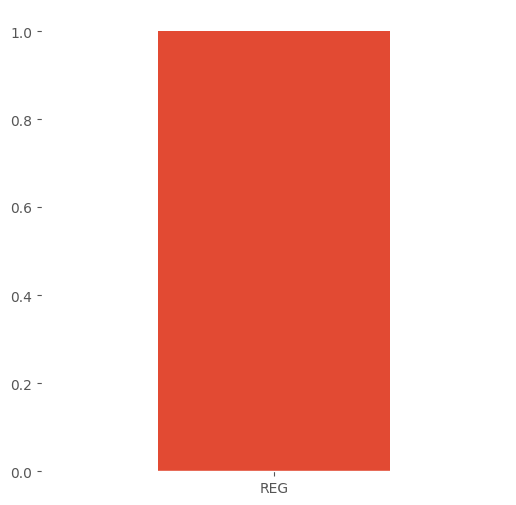

In [121]:
plt.figure(figsize=(6,6))
injuries["Season"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0);

In [122]:

print(injuries["Team"].value_counts())
injuries["Team"].value_counts(normalize=True)

IND    652
SEA    512
GB     511
DAL    503
NYG    484
CIN    464
LAC    459
LV     457
JAX    433
CAR    426
NO     425
NYJ    421
BUF    417
CLE    413
HOU    407
DET    404
CHI    403
BAL    395
PIT    387
TB     377
TEN    372
LA     359
WAS    358
MIN    342
DEN    329
SF     320
PHI    319
KC     309
NE     302
ARI    294
ATL    289
MIA    268
Name: Team, dtype: int64


IND    0.050894
SEA    0.039966
GB     0.039888
DAL    0.039263
NYG    0.037780
CIN    0.036219
LAC    0.035829
LV     0.035672
JAX    0.033799
CAR    0.033253
NO     0.033175
NYJ    0.032862
BUF    0.032550
CLE    0.032238
HOU    0.031770
DET    0.031535
CHI    0.031457
BAL    0.030833
PIT    0.030208
TB     0.029428
TEN    0.029038
LA     0.028023
WAS    0.027945
MIN    0.026696
DEN    0.025681
SF     0.024979
PHI    0.024900
KC     0.024120
NE     0.023573
ARI    0.022949
ATL    0.022559
MIA    0.020920
Name: Team, dtype: float64

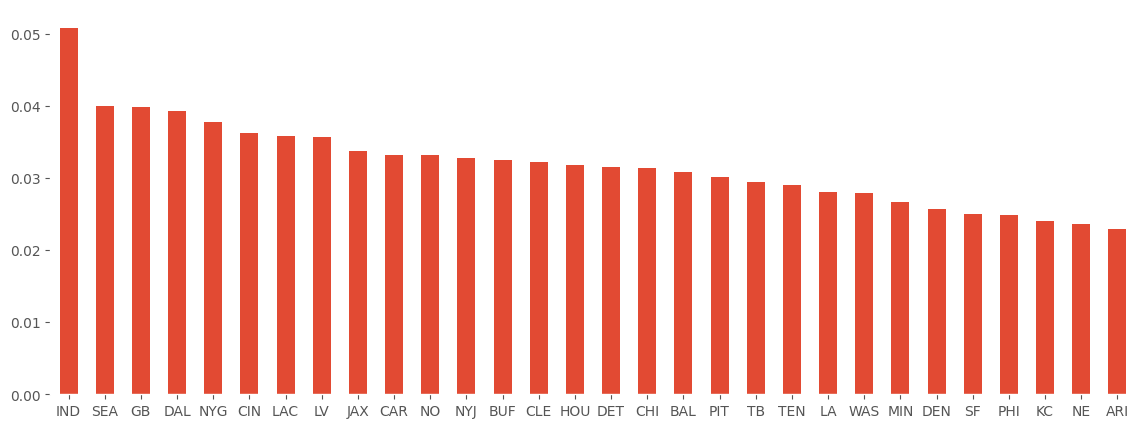

In [123]:
plt.figure(figsize=(14,5))
injuries["Team"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 0);

In [124]:
print(injuries["Position"].value_counts())
injuries["Position"].value_counts(normalize=True)

Linebacker          1947
Cornerback          1651
Wide receiver       1615
Running back        1173
Safety              1117
Offensive tackle    1022
Defense end         1011
Tight end            860
Defensive tackle     855
Guard                714
Quarterback          371
Center               336
Kicker                85
Punter                29
Long snapper          21
Kicker returner        3
Punt returner          1
Name: Position, dtype: int64


Linebacker          0.151979
Cornerback          0.128874
Wide receiver       0.126064
Running back        0.091562
Safety              0.087191
Offensive tackle    0.079775
Defense end         0.078917
Tight end           0.067130
Defensive tackle    0.066740
Guard               0.055733
Quarterback         0.028959
Center              0.026227
Kicker              0.006635
Punter              0.002264
Long snapper        0.001639
Kicker returner     0.000234
Punt returner       0.000078
Name: Position, dtype: float64

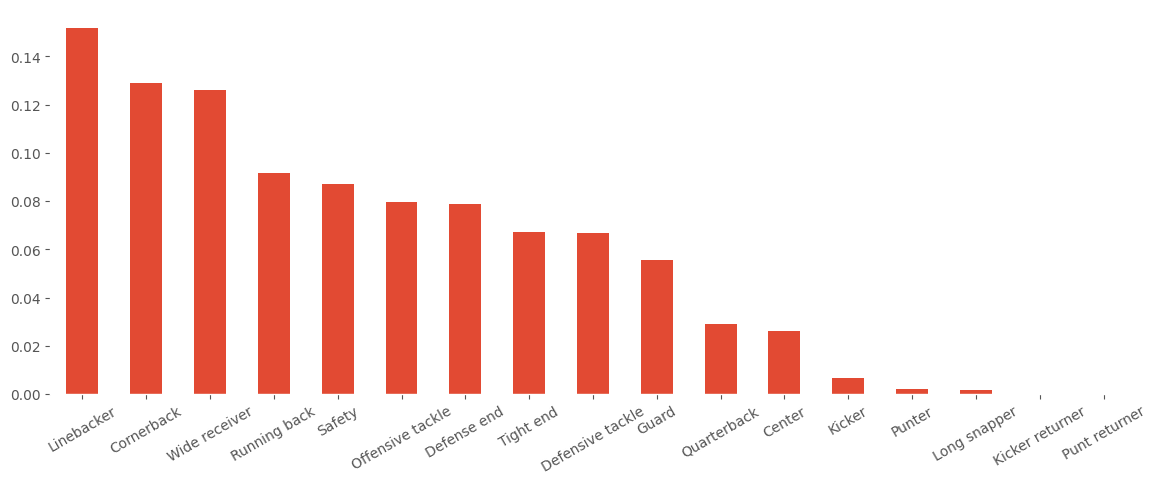

In [125]:
plt.figure(figsize=(14,5))
injuries["Position"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 30);

In [126]:
print(injuries["Player"].value_counts())
injuries["Player"].value_counts(normalize=True)

Eddie Royal        33
Louis Delmas       31
Jordan Reed        27
Marcus Gilbert     26
A.J. Green         25
                   ..
Bobby Rainey        1
Luther Robinson     1
Jayson DiManche     1
Tramain Jacobs      1
Dwayne Haskins      1
Name: Player, Length: 3118, dtype: int64


Eddie Royal        0.002576
Louis Delmas       0.002420
Jordan Reed        0.002108
Marcus Gilbert     0.002030
A.J. Green         0.001951
                     ...   
Bobby Rainey       0.000078
Luther Robinson    0.000078
Jayson DiManche    0.000078
Tramain Jacobs     0.000078
Dwayne Haskins     0.000078
Name: Player, Length: 3118, dtype: float64

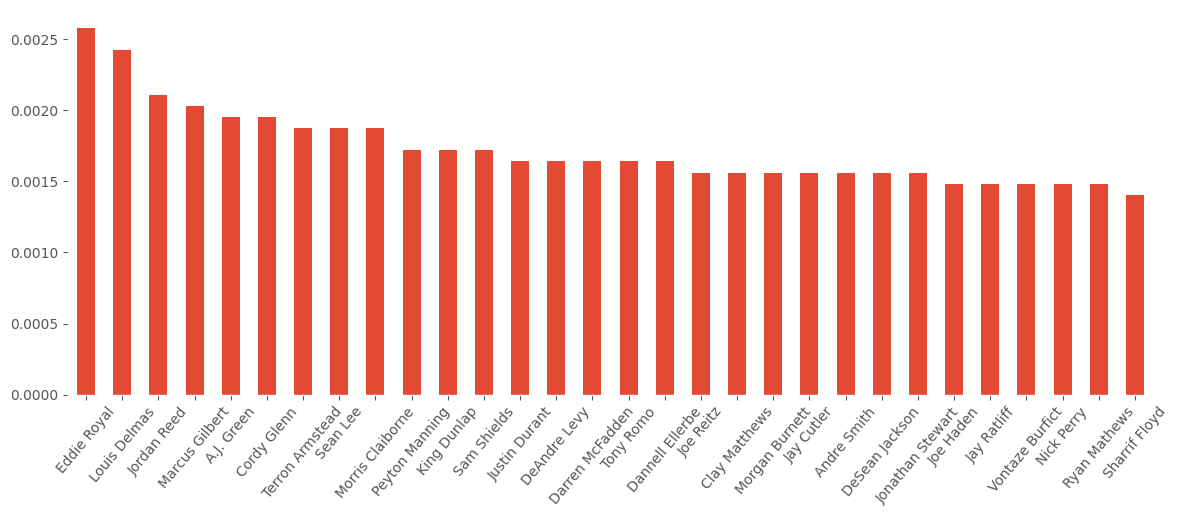

In [127]:
plt.figure(figsize=(14,5))
injuries["Player"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 50);

In [128]:
print(injuries["report_primary_injury"].value_counts())
injuries["report_primary_injury"].value_counts(normalize=True)

Knee          2375
Ankle         1905
Hamstring     1611
Concussion     964
Foot           828
              ... 
Tailbone         1
Kidney           1
Nose             1
Stomach          1
Ankles           1
Name: report_primary_injury, Length: 74, dtype: int64


Knee          0.185388
Ankle         0.148700
Hamstring     0.125751
Concussion    0.075248
Foot          0.064632
                ...   
Tailbone      0.000078
Kidney        0.000078
Nose          0.000078
Stomach       0.000078
Ankles        0.000078
Name: report_primary_injury, Length: 74, dtype: float64

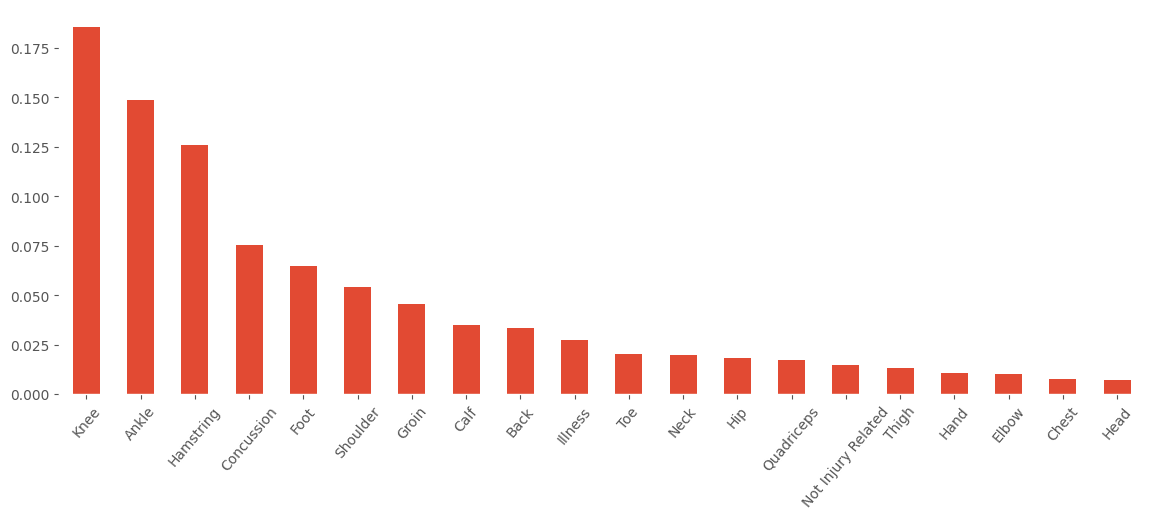

In [129]:
plt.figure(figsize=(14,5))
injuries["report_primary_injury"].value_counts(normalize=True).head(20).plot.bar()
plt.xticks(rotation = 50);

In [130]:
print(injuries["report_status"].value_counts())
injuries["report_status"].value_counts(normalize=True)

Out             8449
Questionable    2346
Doubtful        1680
Probable         336
Name: report_status, dtype: int64


Out             0.659511
Questionable    0.183124
Doubtful        0.131137
Probable        0.026227
Name: report_status, dtype: float64

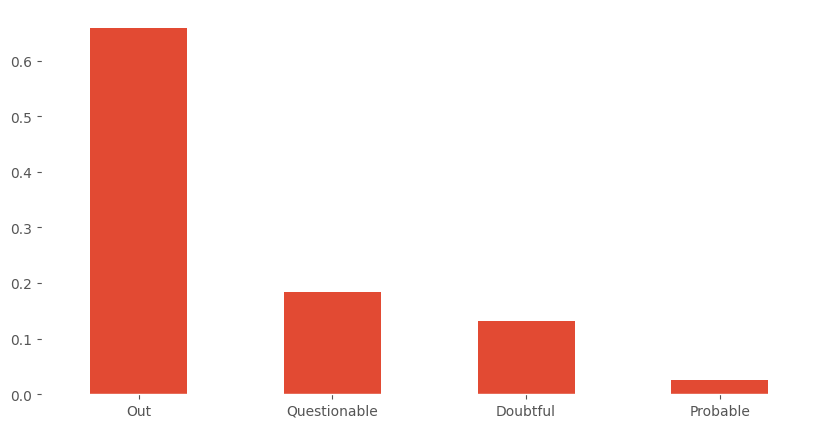

In [131]:
plt.figure(figsize=(10,5))
injuries["report_status"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 0);

In [132]:
print(injuries["practice_primary_injury"].value_counts())
injuries["practice_primary_injury"].value_counts(normalize=True)

Knee                2369
Ankle               1904
Hamstring           1610
Concussion           965
Foot                 828
                    ... 
Lacerated Kidney       1
Kidney                 1
Flu                    1
Arch                   1
Ankles                 1
Name: practice_primary_injury, Length: 73, dtype: int64


Knee                0.184919
Ankle               0.148622
Hamstring           0.125673
Concussion          0.075326
Foot                0.064632
                      ...   
Lacerated Kidney    0.000078
Kidney              0.000078
Flu                 0.000078
Arch                0.000078
Ankles              0.000078
Name: practice_primary_injury, Length: 73, dtype: float64

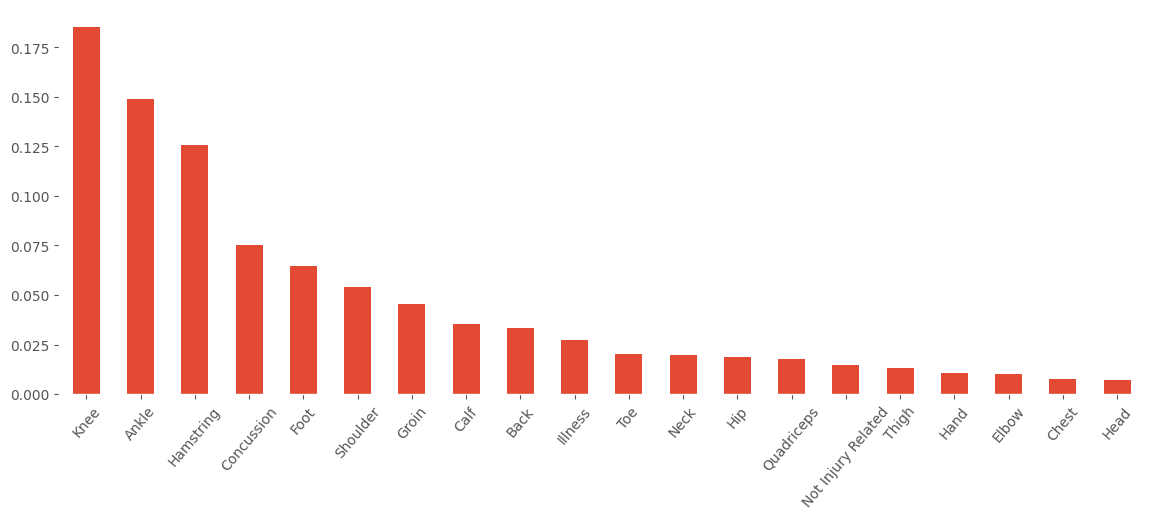

In [133]:
plt.figure(figsize=(14,5))
injuries["practice_primary_injury"].value_counts(normalize=True).head(20).plot.bar()
plt.xticks(rotation = 50);

In [134]:
print(injuries["practice_status"].value_counts())
injuries["practice_status"].value_counts(normalize=True)


Did Not Participate In Practice    12122
Out (Definitely Will Not Play)       689
Name: practice_status, dtype: int64


Did Not Participate In Practice    0.946218
Out (Definitely Will Not Play)     0.053782
Name: practice_status, dtype: float64

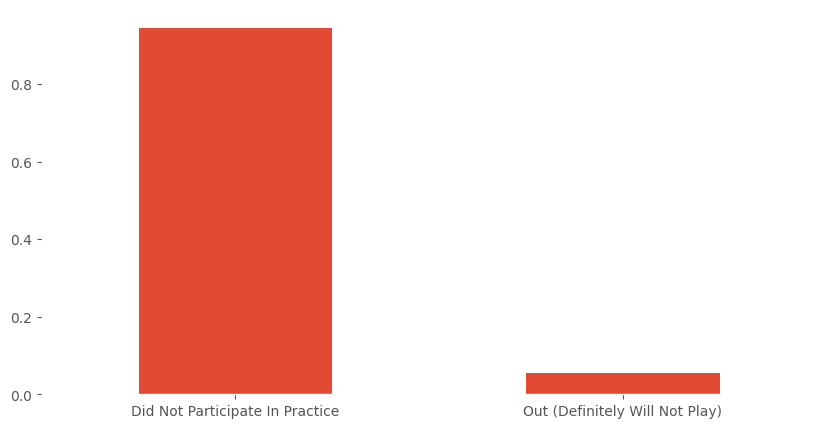

In [135]:
plt.figure(figsize=(10,5))
injuries["practice_status"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0);



# Análisis bivariante/multivariante

Los Wide receiver tienen a 166 jugadores en el ranking.
Los Quarterback tienen a 140 jugadores en el ranking.
Los Linebacker tienen a 134 jugadores en el ranking.
Los Running back tienen a 111 jugadores en el ranking.
Los Defensive end tienen a 106 jugadores en el ranking.
Los Cornerback tienen a 78 jugadores en el ranking.
Los Safety tienen a 62 jugadores en el ranking.
Los Defensive tackle tienen a 62 jugadores en el ranking.
Los Tight end tienen a 54 jugadores en el ranking.
Los Offensive tackle tienen a 49 jugadores en el ranking.
Los Guard tienen a 25 jugadores en el ranking.
Los Center tienen a 12 jugadores en el ranking.
Los Kicker tienen a 1 jugadores en el ranking.


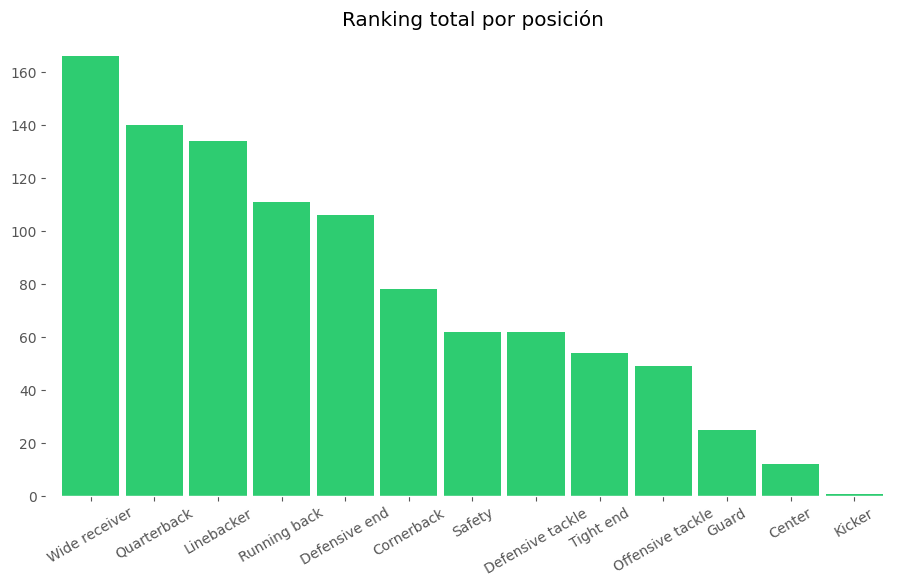

In [136]:
# Filtramos para ver la posicion que más veces ha salido en el top ranking
pos_rank = ranks_nfl["Position"].value_counts()
for position, count in pos_rank.items():
    print(f"Los {position} tienen a {count} jugadores en el ranking.")

# Hacemos una pequeña visualización    
plt.figure(figsize=(11,6))
pos_rank.plot(kind="bar",
              title= "Ranking total por posición",
              width=0.9,
              color="#2ecc71");
plt.xticks(rotation = 30);

-   Segundo dataset:

In [137]:
period = injuries[["Week"]].value_counts().sort_index()
print(period)

Week
1.0     544
2.0     708
3.0     849
4.0     826
5.0     840
6.0     796
7.0     796
8.0     716
9.0     693
10.0    698
11.0    723
12.0    779
13.0    804
14.0    794
15.0    778
16.0    682
17.0    785
dtype: int64


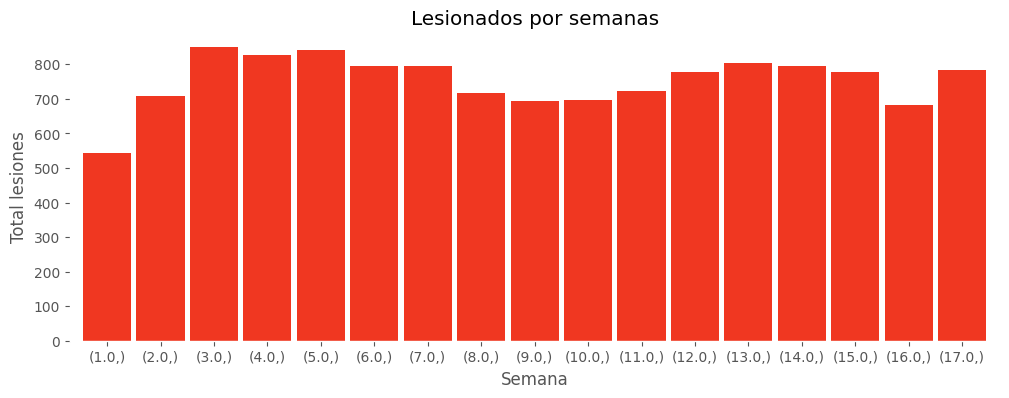

In [138]:
plt.figure(figsize=(12, 4))
period.plot(kind='bar', 
            title= "Lesionados por semanas",
            ylabel= "Total lesiones",
            color="#F03721",
            xlabel = "Semana",
            width=0.9);

plt.xticks(rotation=0);

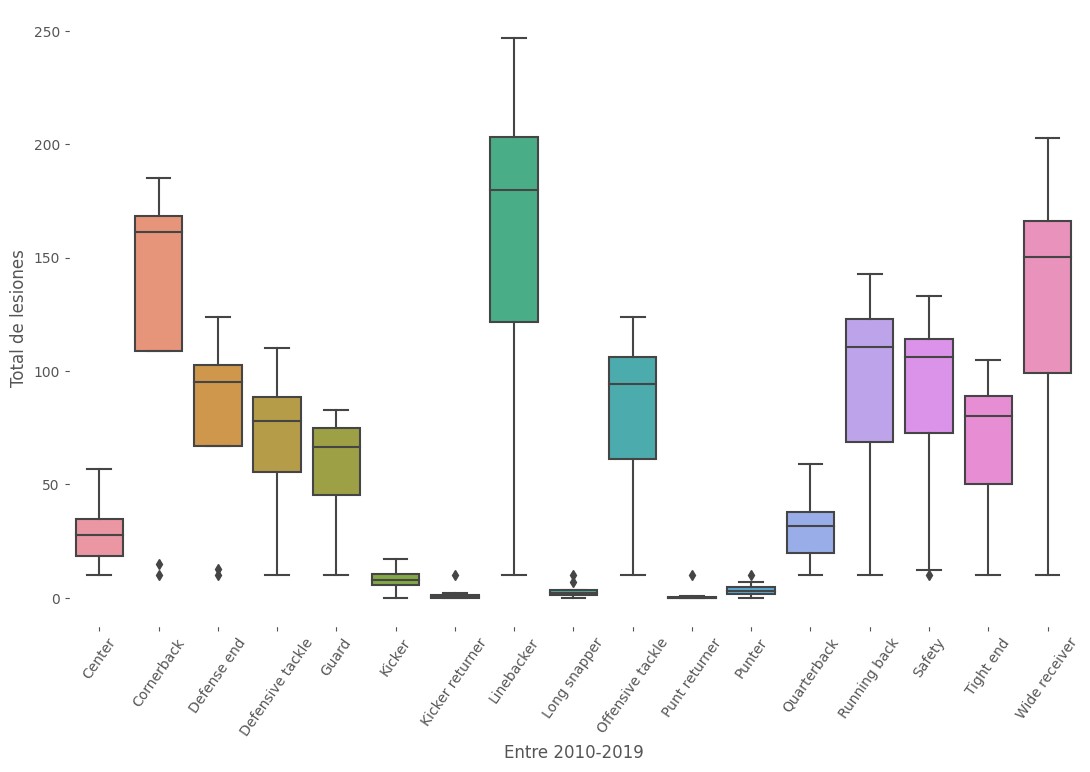

In [139]:
# dentro de las lesiones visualizamos los años y las posiciones
cross_tab = pd.crosstab(index = injuries.Year, columns=injuries.Position)
cross_tab_matrix = np.array(cross_tab)
describe = cross_tab.describe()
plt.figure(figsize=(13, 8))
sns.boxplot(describe);
plt.xticks(rotation=55);
plt.ylabel('Total de lesiones')
plt.xlabel('Entre 2010-2019');

# Hipótesis
    -   Empezamos a realizar nuestra investigación.

> ## ¿En qué epoca del año los jugadores se lesionan más?

In [140]:
injuries.Position.value_counts()

Linebacker          1947
Cornerback          1651
Wide receiver       1615
Running back        1173
Safety              1117
Offensive tackle    1022
Defense end         1011
Tight end            860
Defensive tackle     855
Guard                714
Quarterback          371
Center               336
Kicker                85
Punter                29
Long snapper          21
Kicker returner        3
Punt returner          1
Name: Position, dtype: int64

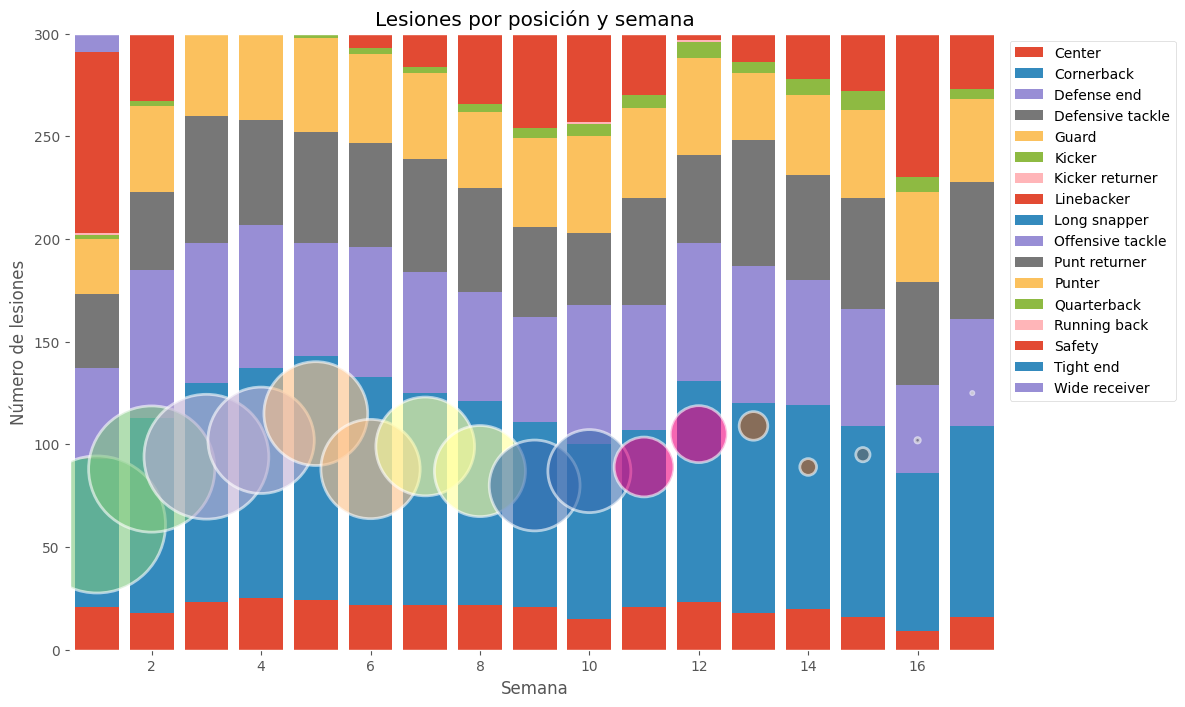

In [141]:
week_period = pd.crosstab(index=injuries.Week, columns=injuries.Position)
matrix_periods = np.array(week_period)

fig, ax = plt.subplots(figsize=(12,8))

for i in range(matrix_periods.shape[1]):
    if i == 0:
        ax.bar(week_period.index, matrix_periods[:, i], label=week_period.columns[i])
    else:
        ax.bar(week_period.index, matrix_periods[:, i], bottom=np.sum(matrix_periods[:, :i], axis=1), label=week_period.columns[i])

ax.set_xlabel('Semana')
ax.set_ylabel('Número de lesiones')
ax.set_title('Lesiones por posición y semana')
ax.set_xlim([0.5, 17.5])
ax.set_ylim([0, 300])
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
plt.scatter(
    x = week_period.index, 
    y = matrix_periods[:, i], 
    c=week_period.index, 
    cmap="Accent",
    s=injuries.Position.value_counts()*5,
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
plt.show()

> ## ¿Cuál es la posición más lesiva?

La posición que más se lesiona es Linebacker


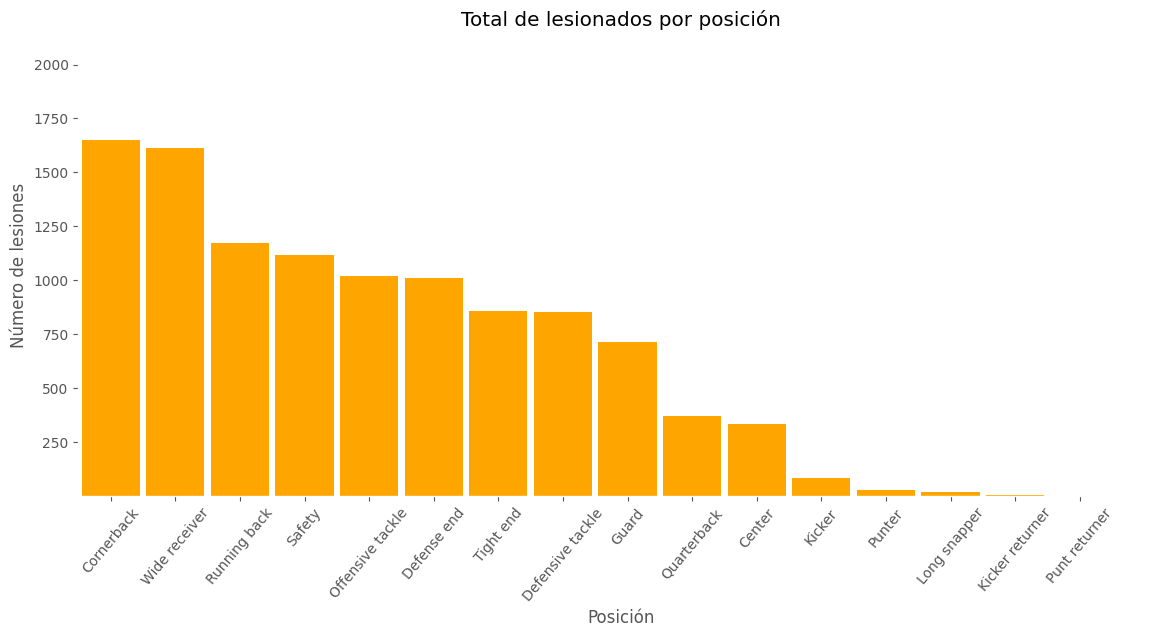

In [142]:
week_period = pd.crosstab(index=injuries.Year, columns=injuries.Position)

plt.style.use(['ggplot', {'axes.facecolor': 'white'}])

# Sumar el número de lesiones por posición
total_injuries_by_position = week_period.sum(axis=0)

# Ordenar de mayor a menor y obtener la posición con más lesiones
most_injured_position = total_injuries_by_position.sort_values(ascending=False).index[0]

print(f"La posición que más se lesiona es {most_injured_position}")

# Ordenar la serie de mayor a menor
total_injuries_by_position_sorted = total_injuries_by_position.sort_values(ascending=False)
plt.figure(figsize=(14, 6))
# Graficar la serie ordenada
plt.bar(total_injuries_by_position_sorted.index, total_injuries_by_position_sorted, width=0.9, color='orange')
plt.xlabel('Posición')
plt.ylabel('Número de lesiones')
plt.title("Total de lesionados por posición")
plt.xlim(0.5)
plt.ylim(0.5, total_injuries_by_position_sorted.max()*1.1)
plt.xticks(rotation=50);


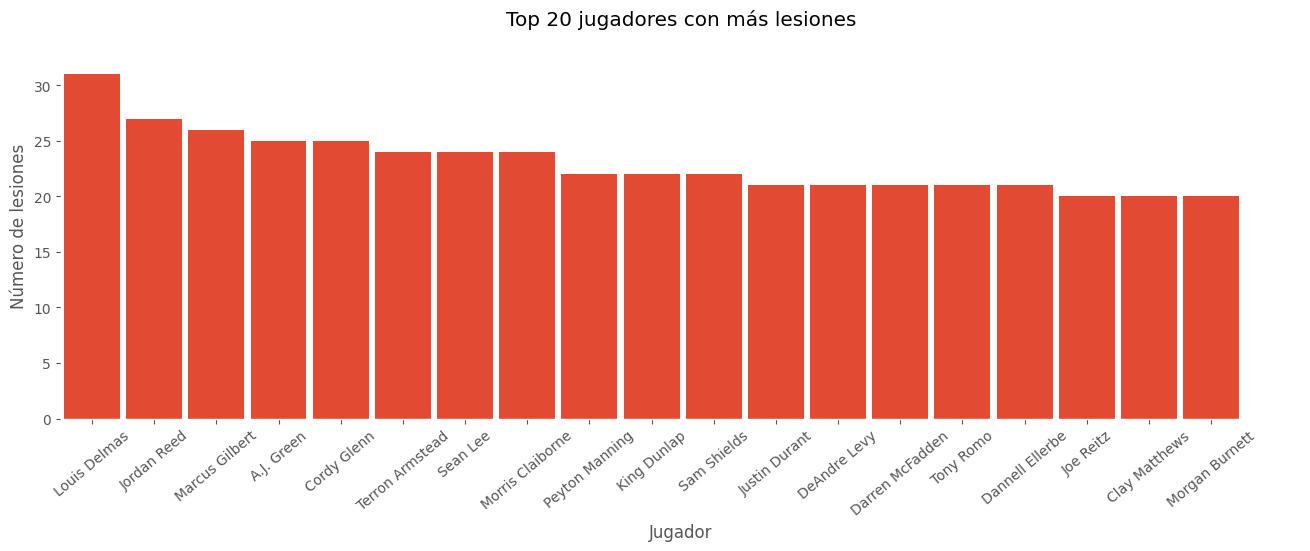

In [143]:
plt.style.use(['ggplot', {'axes.facecolor': 'white'}])

# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Obtener los 100 jugadores con más lesiones
top_20_injured_players = injuries_by_player.head(20)

# Hacemos una visualización
plt.figure(figsize=(16,5))
plt.bar(top_20_injured_players.index, top_20_injured_players, width=0.9)
plt.xlabel('Jugador')
plt.ylabel('Número de lesiones')
plt.title('Top 20 jugadores con más lesiones')
plt.xlim(0.5)
plt.xticks(rotation=40);

> ## ¿Cuáles son las lesiones más habituales?

In [144]:
frequency = injuries["report_primary_injury"].value_counts().head(10)
df_frequency = pd.DataFrame({"Injury Type": frequency.index, "Frequency": frequency.values})
df_frequency.reset_index(drop=True, inplace=True)
df_frequency

,Injury Type,Frequency
0,Knee,2375
1,Ankle,1905
2,Hamstring,1611
3,Concussion,964
4,Foot,828
5,Shoulder,692
6,Groin,585
7,Calf,450
8,Back,427
9,Illness,351


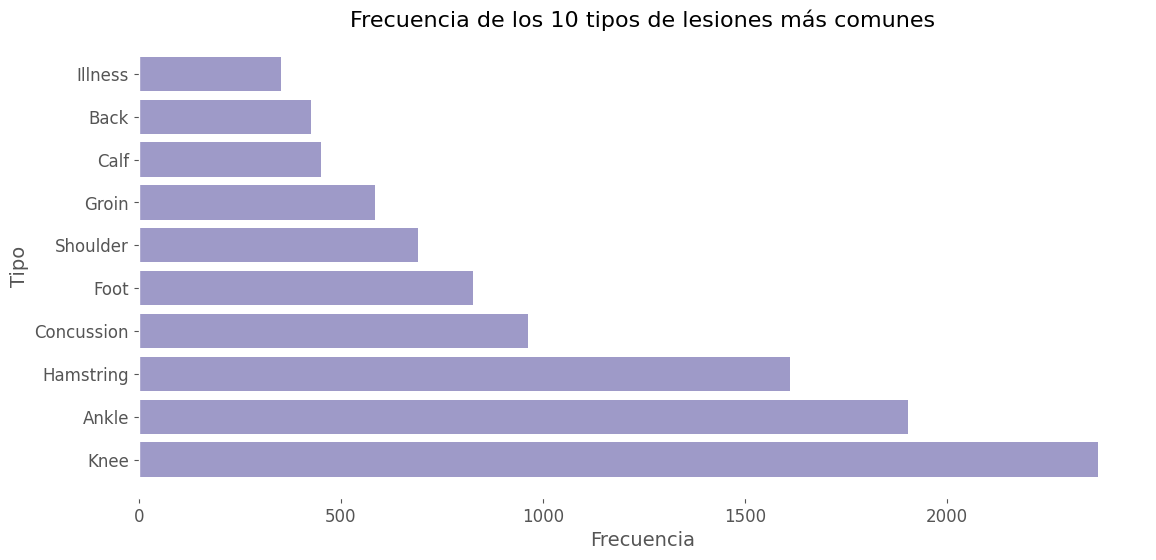

In [145]:
colors = sns.color_palette("Purples",1)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(13,6))
ax.barh(df_frequency["Injury Type"], df_frequency["Frequency"], color=colors)

# Configurar los ejes y etiquetas
ax.set_xlabel("Frecuencia", fontsize=14)
ax.set_ylabel("Tipo", fontsize=14, )
ax.set_title("Frecuencia de los 10 tipos de lesiones más comunes", fontsize=16)

# Configurar los ticks y la grilla
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--');

> ## ¿Cuál es el equipo que más lesiones ha tenido?

In [146]:
team = injuries["Team"].value_counts().head(10)
team_df = pd.DataFrame({"Team": team.index, "Frequency": team.values})
team_df.reset_index(drop=True, inplace=True)
team_df

,Team,Frequency
0,IND,652
1,SEA,512
2,GB,511
3,DAL,503
4,NYG,484
5,CIN,464
6,LAC,459
7,LV,457
8,JAX,433
9,CAR,426


> ## ¿Quién se lesiona más? ¿defensa o ataque?.

In [156]:
injuries.Position.value_counts()

Linebacker          1947
Cornerback          1651
Wide receiver       1615
Running back        1173
Safety              1117
Offensive tackle    1022
Defense end         1011
Tight end            860
Defensive tackle     855
Guard                714
Quarterback          371
Center               336
Kicker                85
Punter                29
Long snapper          21
Kicker returner        3
Punt returner          1
Name: Position, dtype: int64

> ## ¿Cual ha sido, en estos 10 años, el jugador con más lesiones?

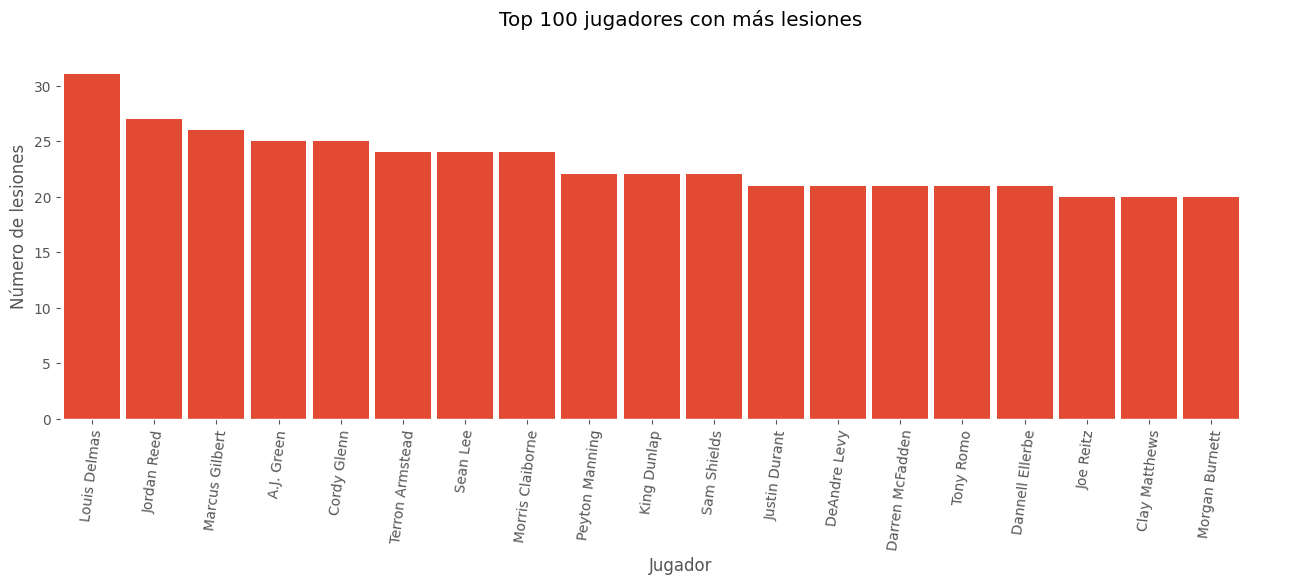

In [148]:
# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Obtener los 100 jugadores con más lesiones
top_20_injured_players = injuries_by_player.head(20)

# Hacemos una visualización
plt.figure(figsize=(16,5))
plt.bar(top_20_injured_players.index, top_20_injured_players, width=0.9)
plt.xlabel('Jugador')
plt.ylabel('Número de lesiones')
plt.title('Top 100 jugadores con más lesiones')
plt.xlim(0.5)
plt.xticks(rotation=83);



In [149]:
#jugador con más lesiones
top_injuried = injuries[['Player', "Position"]].value_counts()

# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Seleccionar el jugador con el número máximo de lesiones
most_injured_player = injuries_by_player.idxmax()

print(f"El jugador que más se ha lesionado es {most_injured_player}. Ha estado casi 2 años fuera del terreno de juego")
print(f"Aunque la posoción de Linebacker es la más afectada por las lesionas, podemos ver claramente que no estan dentro del top 5 de los más lesionados")

print(f"{top_injuried.head(10)}")

El jugador que más se ha lesionado es Eddie Royal. Ha estado casi 2 años fuera del terreno de juego
Aunque la posoción de Linebacker es la más afectada por las lesionas, podemos ver claramente que no estan dentro del top 5 de los más lesionados
Player            Position        
Eddie Royal       Wide receiver       33
Louis Delmas      Safety              31
Jordan Reed       Tight end           27
Marcus Gilbert    Offensive tackle    26
Cordy Glenn       Offensive tackle    25
A.J. Green        Wide receiver       25
Terron Armstead   Offensive tackle    24
Sean Lee          Linebacker          24
Morris Claiborne  Cornerback          24
King Dunlap       Offensive tackle    22
dtype: int64


> ## ¿Dentro del ranking lesivo hay estrellas que han estado dentro de los top 100 nfl?

In [150]:
top_100_injured_players = injuries['Player'].value_counts()

top_100_injured_players = top_100_injured_players.to_frame().head(100)

# Hacemos un reset para tener nuevo indice generar una columna llamada "Player"
top_100_injured_players.reset_index(inplace=True)

# renombramos nuestras columnas
top_100_injured_players.rename(columns={"index":"Player", "Player":"Times"}, inplace=True)

#Hacemos una máscara para averiguar si exiten coincidencias
mascara = ranks_nfl['Player'].isin(top_100_injured_players['Player'])

# Numero de veces han coincido que un jugador ha estado dentro del top 100
injury_top = mascara.sum()

print(f"El número de veces que dentro de los 100 más lesionados ha aparecido en el top 100 ranking es de: {injury_top}")

El número de veces que dentro de los 100 más lesionados ha aparecido en el top 100 ranking es de: 126


> ## ¿Cual es la relacion entre el éxito y las lesiones de la carrera de un jugador?

In [151]:
# Numero de veces ha estado lesionado un jugador
injuries[injuries["Player"]=="Peyton Manning"]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
1326,2011.0,REG,IND,1.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1401,2011.0,REG,IND,2.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1485,2011.0,REG,IND,3.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1582,2011.0,REG,IND,4.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1667,2011.0,REG,IND,5.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1757,2011.0,REG,IND,6.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1834,2011.0,REG,IND,7.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1910,2011.0,REG,IND,8.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1975,2011.0,REG,IND,9.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
2059,2011.0,REG,IND,10.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)


In [152]:
# numero de veces en los rankings nfl de Peyton manning
Manning = ranks_nfl[ranks_nfl["Player"]=="Peyton Manning"]
print("A pesar de haber estado más de 1 año lesionado consiguió volver y entrar en el top 5 de jugadores 3 años, claro ejemplo de superación y éxito")
Manning

A pesar de haber estado más de 1 año lesionado consiguió volver y entrar en el top 5 de jugadores 3 años, claro ejemplo de superación y éxito


,Rank,Player,Position,Year
1,2,Peyton Manning,Quarterback,2010.0
149,50,Peyton Manning,Quarterback,2011.0
201,2,Peyton Manning,Quarterback,2012.0
300,1,Peyton Manning,Quarterback,2013.0
404,5,Peyton Manning,Quarterback,2014.0


> ## Correlacion entre promedio de lesiones por año con posiciones

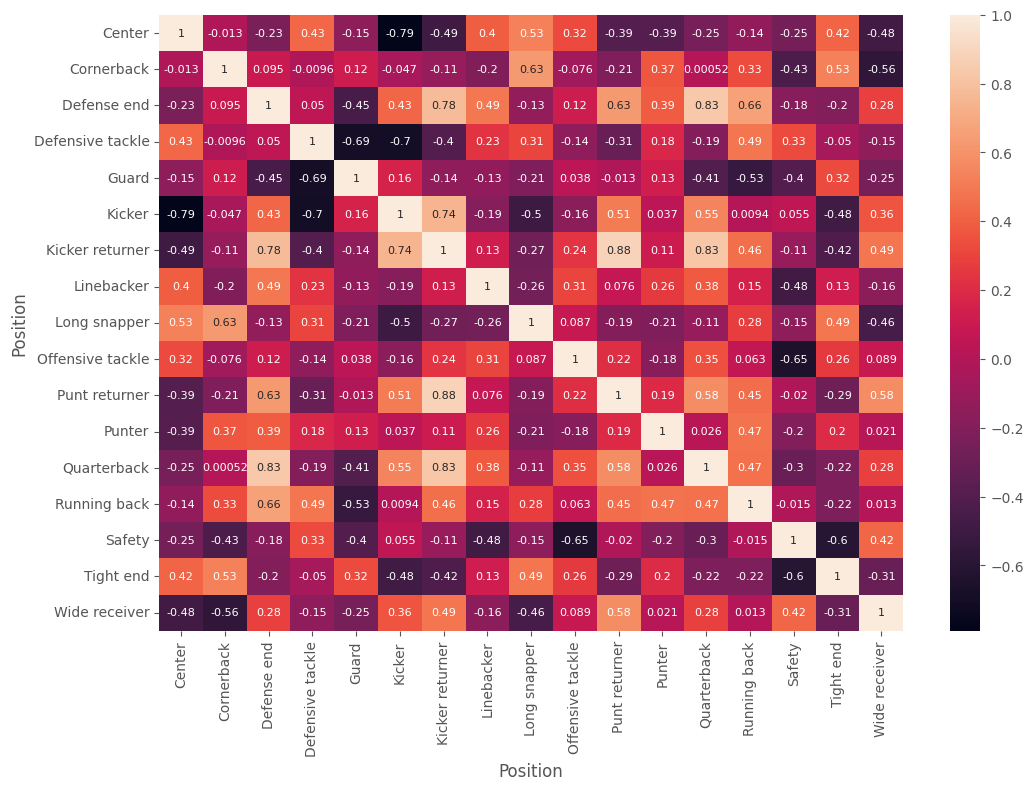

In [153]:
correlacion_mega = pd.crosstab(index = injuries.Year, columns=injuries.Position)
correlacion_mega_matrix = np.array(correlacion_mega)
correlacion_mega
corr_xyz = correlacion_mega.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_xyz, annot=True, annot_kws={"size": 8});

In [154]:
lineplot

NameError: name 'lineplot' is not defined

A la grafica de arriba chi-4
distribuir las posiciones entre defensa y ataque
con un index anual

Prueba de independencia:
 esta prueba se utiliza para determinar si existe una relación entre dos variables categóricas. La hipótesis nula es que las variables son independientes, mientras que la hipótesis alternativa es que las variables están relacionadas. Esta prueba se puede realizar utilizando una tabla de contingencia y la prueba de chi-cuadrado.

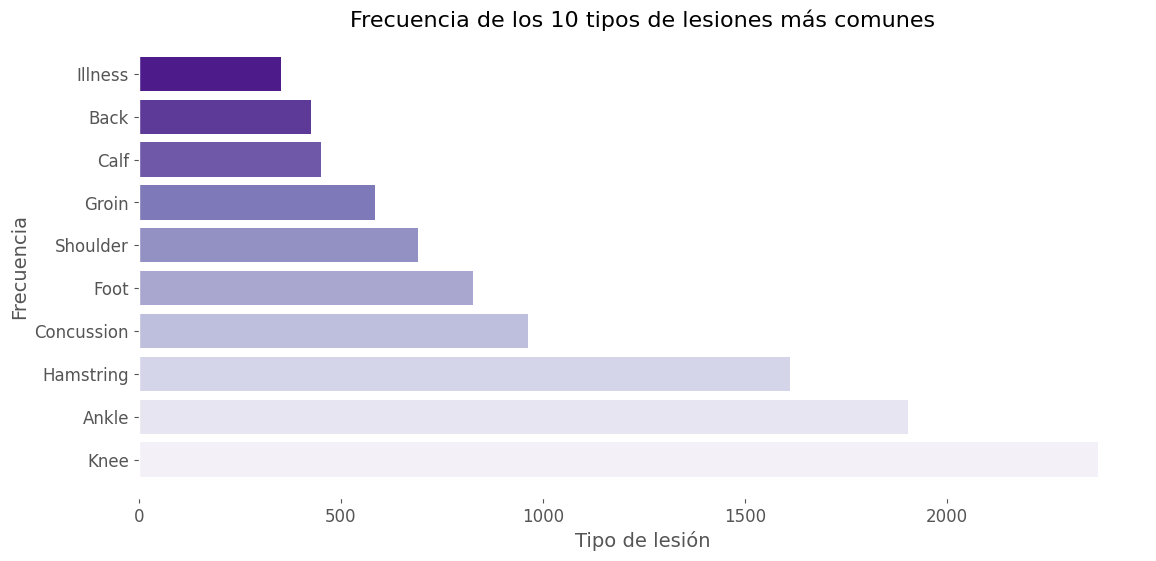

In [ ]:
colors = sns.color_palette("Purples",10)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(13,6))
ax.barh(df_frequency["Injury Type"], df_frequency["Frequency"], color=colors)

# Configurar los ejes y etiquetas
ax.set_xlabel("Tipo de lesión", fontsize=14)
ax.set_ylabel("Frecuencia", fontsize=14)
ax.set_title("Frecuencia de los 10 tipos de lesiones más comunes", fontsize=16)

# Configurar los ticks y la grilla
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--')

# Mostrar el gráfico
plt.show()

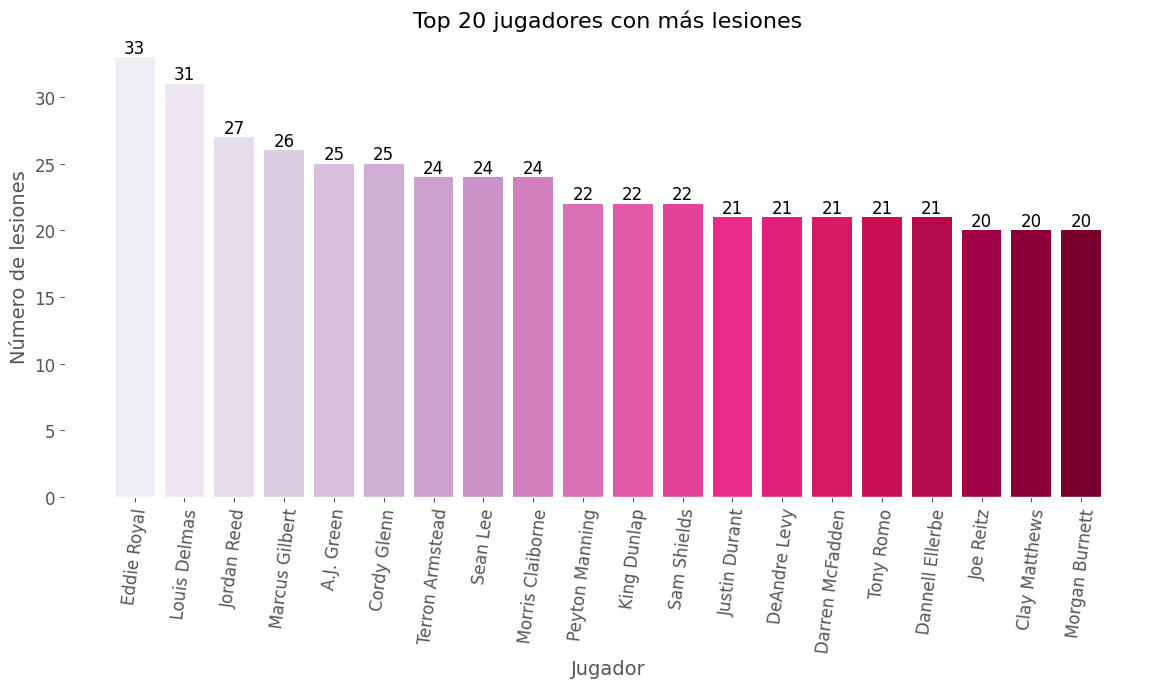

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Obtener los 20 jugadores con más lesiones
top_20_injured_players = injuries_by_player.head(20)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
colors = sns.color_palette("PuRd", len(top_20_injured_players))
bars = ax.bar(top_20_injured_players.index, top_20_injured_players.values, color=colors)

# Añadir etiquetas a las barras
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f"{top_20_injured_players.values[i]}", ha='center', va='bottom', fontsize=12)

# Configurar los ejes y etiquetas
ax.set_xlabel("Jugador", fontsize=14)
ax.set_ylabel("Número de lesiones", fontsize=14)
ax.set_title("Top 20 jugadores con más lesiones", fontsize=16)

# Configurar los ticks y la grilla
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--')
plt.xticks(rotation=83)
# Mostrar el gráfico
plt.show()


Prueba de correlacion chi cuadrado

##### ***3. Fuentes***<a id='4'></a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

## <a href ='#0'> 🔝 To the moon 🔝 </a>